# **Project Name**
$\color{blue}{\text{Overdose AI
Data Science internship Task}}$

### **Project type** - Regression
### **Contribution** - Individual
### **Team Member1** - $\color{Green}{\text{Surya Prakash}}$

# **Project Summary**

**Data Preprocessing** : 

1. Getting the dataset
2. Importing libraries
3. Importing datasets
4. Finding Missing Data
5. Encoding Categorical Data
6. Data Cleaning and Feature Engineering

**Exploratory data analysis(EDA) :** 

1.Firstly Checked correlation between Each Features in dataset.

2.Checked Relation between status and selling price of the item 

3.Checked Relation between item_type and selling price of the item 

4.Checked country and selling price distribution of dataset 

5.Created New variable Area by multiplyin width and thicknes of the item of the dataset  

6.Checked distribution of selling price affected by difference in item_date and delivery date 

7.Created a new variable Date difference by calculating difference between item_date and delivery date 

8.Removed columns like application and item_type which was acting as a noise to overfitt the model

9.Checked skewness of data and normalized them 


**Supervise Machine learning algorithms and implementation :**


1. Lasso regression   - Achieved Accuracy 30% on test dataset 

2. Deciso Tree Regressor  - Achieved Accuracy - 93% on test data set  

2. Random Forest Regressor  - Achieved Accuracy - 81% on test data set

3. XG Boost Regressor-    Achieved Accuracy - 93% on test data set


**Model explainaibility on Best performing model**

1. performed shap and eli5 on xgboostregressor 

2. Data Difference is the most import feature in Model

3. Bias and product_ref have high weights assigned

## Data overview and column description

| **Column** |**Example**|
| ------------ | ----------|
| *id* |  EC06F063-9DF0-440C-8764-0B0C05A4F6AE   |
| *item_date* | *Row 2 Column 2* |  20210401  |
| *quantity tons* | *Row 3 Column 2* | 54.1511386169278  |
|*customer*||30156308|
|*country*||28|
|*status*||won|
|*item_type*||w|
|*application*||10|
|*Thickness*||2|
|*Width*||1500|
|*material_ref*||1670798778|
|*product_ref*||671863738|
|*Delivery Date*||20210110|
|*selling_price*||782|


# **Let's Begin**

## ***Know Your Data***

### **Import Libraries**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew
from scipy.stats import yeojohnson
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

### **Datset Loading**

In [2]:
# Function to load the data 
def DataLoader(path):
    """
    A function to load the datset 
    Argumet - Path(path to the data file)
    return - dataframe
    """
    try:
        dataframe = pd.read_excel(path)
        return dataframe
    except: # if path is incorrect or does not exist
        print("path does not find")

    finally:
        print("operation performed on the  dataset Location")


In [3]:
daily_offers_dataset = DataLoader("daily_offers.xlsx")

operation performed on the  dataset Location


### **Dataset First View**

In [4]:
# Dataset First Look
daily_offers_dataset.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


### Dataset Rows & Columns count

In [5]:
print(f"the dataset has toltal of  {daily_offers_dataset.shape[0]} rows and {daily_offers_dataset.shape[1]} columns") 

the dataset has toltal of  181673 rows and 14 columns


### Dataset Information

In [6]:
# Dataset Info
daily_offers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
print(f' We have {daily_offers_dataset.duplicated().sum()} duplicate values in dataset.')

 We have 0 duplicate values in dataset.


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
daily_offers_dataset.isna().sum().sort_values(ascending=False)

material_ref     77919
country             28
application         24
id                   2
status               2
item_date            1
customer             1
thickness            1
delivery date        1
selling_price        1
quantity tons        0
item type            0
width                0
product_ref          0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

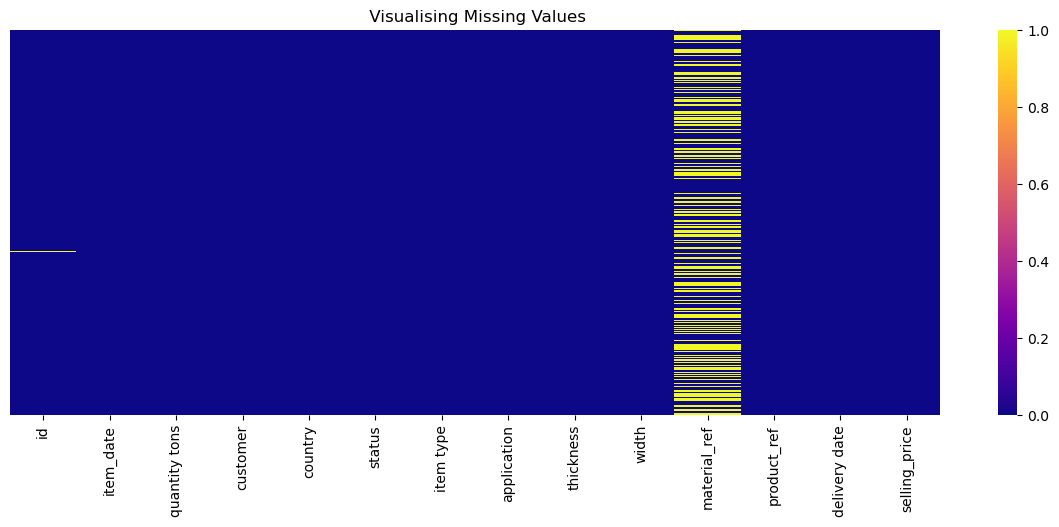

In [9]:
# Visualizing the missing values
plt.figure(figsize=(15,5))
sns.heatmap(daily_offers_dataset.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

## **Understanding The Variables**

In [10]:
# Dataset Columns
daily_offers_dataset.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [11]:
# Dataset Describe 
daily_offers_dataset.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [12]:
def datacategory(dataframe):
    """ 
    A function To segragate the numerical and categorical columns data from pandas dataframe

    Argument- dataframe to which action is to performed

    returns - list of caetogriacl and numerical data 
    """
    categorical_data = []
    numerical_data= []
    for i in dataframe.columns.tolist():
        if dataframe[i].dtype =="O": # if data type of columns is object 
            categorical_data.append(i)

        else:
            numerical_data.append(i)
    print(f'total no of categorical data is {len(categorical_data)}')
    print(f'total no of numerical data is {len(numerical_data)}')

    return categorical_data, numerical_data

In [13]:
categorical_columns, numerical_columns = datacategory(daily_offers_dataset)

total no of categorical data is 5
total no of numerical data is 9


In [14]:
#print unique value in categorical value 
#since the dataset is large numerical value whose unique number are less than should be focussed

def print_values(dataframe):
    for i in dataframe.columns.tolist():
        if dataframe[i].dtype=='O':
            print(f"the categorical column {i} have {dataframe[i].nunique()} unique values ")
            if dataframe[i].nunique() <=50 :
                print(f"the unique value in the columns are {dataframe[i].unique()}")
        else:
            print(f"the  numerical column {i} have {dataframe[i].nunique()} unique values ")
            if dataframe[i].nunique() <=50:
                print(f" the unique value in the columns are{dataframe[i].unique()}")

In [15]:
# call the function to see the unique categorical value if it is less than 50 
print_values(daily_offers_dataset[categorical_columns])

the categorical column id have 181671 unique values 
the categorical column quantity tons have 181673 unique values 
the categorical column status have 9 unique values 
the unique value in the columns are ['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable' nan]
the categorical column item type have 7 unique values 
the unique value in the columns are ['W' 'WI' 'S' 'Others' 'PL' 'IPL' 'SLAWR']
the categorical column material_ref have 16563 unique values 


In [16]:
# call the function to see the unique numerical_columns value if it is less than 50 
print_values(daily_offers_dataset[numerical_columns])

the  numerical column item_date have 252 unique values 
the  numerical column customer have 1169 unique values 
the  numerical column country have 17 unique values 
 the unique value in the columns are[ 28.  25.  30.  32.  38.  78.  27.  77. 113.  79.  26.  39.  40.  84.
  80. 107.  89.  nan]
the  numerical column application have 30 unique values 
 the unique value in the columns are[10. 41. 28. 59. 15.  4. 38. 56. 42. 26. 27. 19. 20. 66. 29. 22. 40. 25.
 67. 79.  3. 99.  2.  5. 39. 69. 70. 65. 58. 68. nan]
the  numerical column thickness have 594 unique values 
the  numerical column width have 1386 unique values 
the  numerical column product_ref have 33 unique values 
 the unique value in the columns are[1670798778 1668701718     628377     640665     611993 1668701376
  164141591 1671863738 1332077137     640405 1693867550 1665572374
 1282007633 1668701698     628117 1690738206     628112     640400
 1671876026  164336407  164337175 1668701725 1665572032     611728
 1721130331 1693

##  ***Data Wrangling***

### Data Wrangling Code

#### Handling Missing Values

In [17]:
# Convert "item_date" column to datetime format
daily_offers_dataset["item_date"] = pd.to_datetime(daily_offers_dataset["item_date"], format='%Y%m%d', errors='coerce')

In [18]:
# Convert "delivery date" column to datetime format
daily_offers_dataset["delivery date"] = pd.to_datetime(daily_offers_dataset["delivery date"], format='%Y%m%d', errors='coerce')

*We will use forward method to fill the missing value since the column is time series data , also the data is is 252 days ,where as delivery data is of only 8 days so forward methode seemed most appropriate than others*

In [19]:
# Impute missing values with the previous  value
daily_offers_dataset["item_date"] =daily_offers_dataset["item_date"].fillna(method='ffill')  # Forward fill

In [20]:
# Impute missing values with the previous  value
daily_offers_dataset["delivery date"] =daily_offers_dataset["delivery date"].fillna(method='ffill')  # Forward fill

*Thickness of the item can be different for different product we can use mean value to compute the missing value in a dataframe*

In [21]:
# Fill the missing values in column 'Thickness' with the mean of non-missing values
mean_B = daily_offers_dataset['thickness'].mean()
daily_offers_dataset['thickness'] = daily_offers_dataset['thickness'].fillna(mean_B)

In [22]:
# should not fil missing value in Our target variable 
daily_offers_dataset.dropna(subset=['selling_price'], inplace=True)

In [23]:
# status have only two missing values 
# fill it with mode value 

# fill missing values with the mode of the 'status' column
mode_val = daily_offers_dataset['status'].mode()[0]
daily_offers_dataset['status'] = daily_offers_dataset['status'].fillna(mode_val)

*Since most of the missing value now are categorical data and the data set consist of customer behavious the rows with similar behaviour ca may be imputer by taking reference from their neighburs which have similar propert*

In [24]:
# select the columns to impute
cols_to_impute = ['application',  'customer','country']
# create the imputer
imputer = KNNImputer(n_neighbors=5)

# fit and transform the imputer on the selected columns
imputed_cols = imputer.fit_transform(daily_offers_dataset[cols_to_impute])

# replace the original columns with the imputed values
daily_offers_dataset[cols_to_impute] = imputed_cols

In [25]:
# id column have 181671 unique values
# it accouts as serial number for the row 
daily_offers_dataset.drop("id",axis=1,inplace =True)

In [26]:
#material_ref ave almost 60%  as Nan value
# it also has 1678 unique categoriacl value 
daily_offers_dataset.drop("material_ref",axis=1,inplace =True)

#### Univariate analysis 

*With respect to item date*

In [27]:
# set the 'date' column as the index
daily_offers_dataset_item_date =daily_offers_dataset.set_index('item_date')

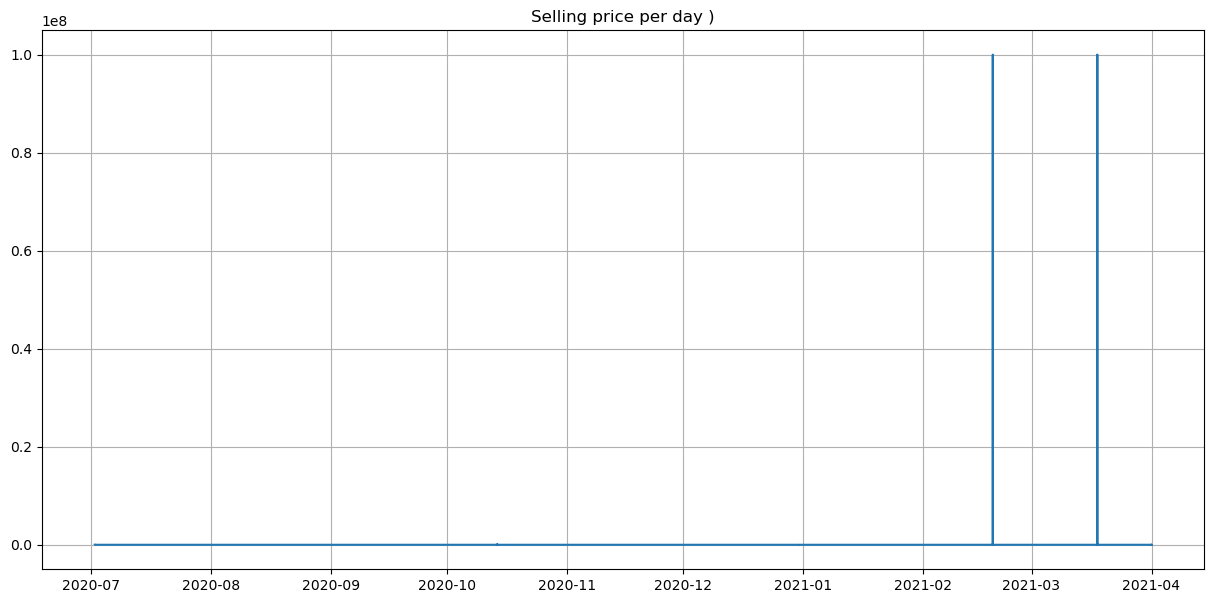

In [28]:
plt.figure(figsize=(15, 7))
plt.plot(daily_offers_dataset_item_date.selling_price)
plt.title('Selling price per day )')
plt.grid(True)
plt.show()

*It shows on large number of calendr days are our selling prce are zero must inspect them*

In [29]:
# see if there are selling price which are less than zero
daily_offers_dataset[daily_offers_dataset["selling_price"]< 0 ]

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
28,2021-04-01,99.059199,30153510.0,30.0,Won,W,41.0,0.595,1207.0,611993,2021-04-01,-1160.0
44761,2021-02-04,101.397995,30198657.0,32.0,Won,W,41.0,1.250,1100.0,1721130331,2021-04-01,-730.0
44810,2021-02-03,12.225889,30157111.0,78.0,Won,W,41.0,0.750,1250.0,164141591,2021-04-01,-445.0
44865,2021-02-03,28.368563,30217604.0,27.0,Not lost for AM,PL,10.0,1.500,1270.0,164141591,2021-05-01,-25.0
105189,2020-11-12,5.280274,30209814.0,25.0,Won,W,15.0,6.000,1250.0,1671863738,2021-02-01,-336.0


*selling price could not be negative , it can either be greater than 0 or equal to zero not less than zero these rows fortunately these are only 5 rows so we can remove these rows*

In [30]:
#select those rows where selling price are greater than zero 
daily_offers_dataset= daily_offers_dataset[daily_offers_dataset["selling_price"] >= 0 ]

*wit respect to delivery date*

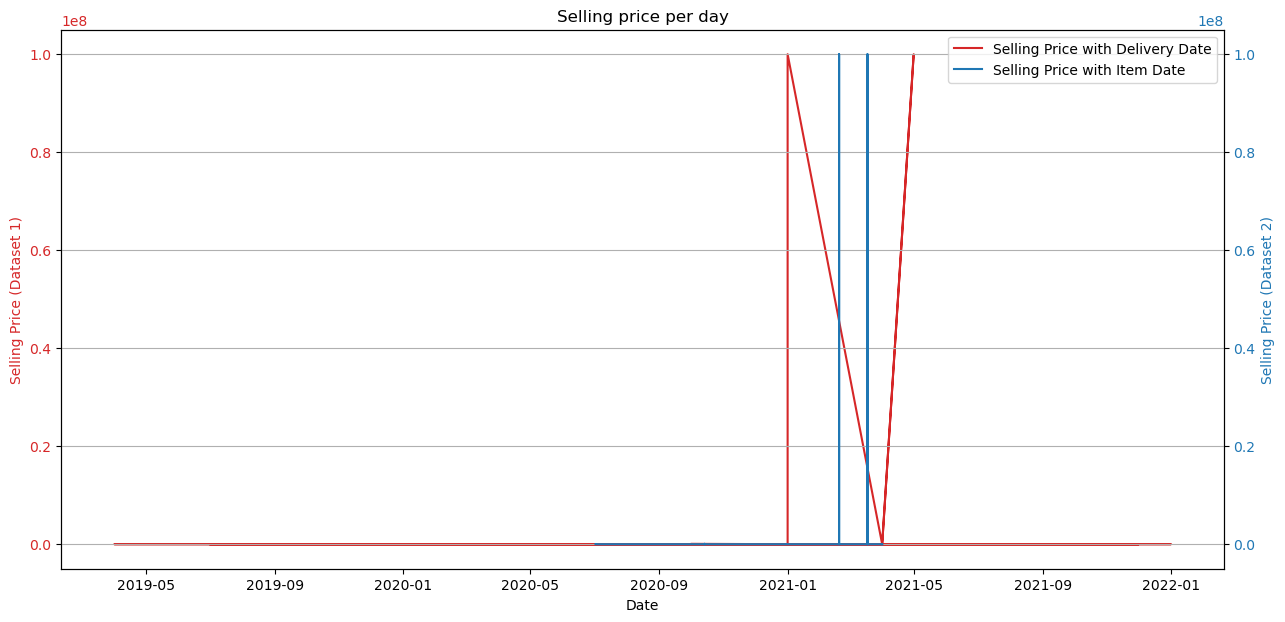

In [31]:


# set the 'delivery date' column as the index for the first dataset
daily_offers_dataset1 =daily_offers_dataset.set_index('delivery date')

# set the 'item_date' column as the index for the second dataset
daily_offers_dataset2=daily_offers_dataset.set_index('item_date')

# plot the 'selling_price' column for the first dataset
fig, ax1 = plt.subplots(figsize=(15, 7))
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Selling Price (Dataset 1)', color=color)
ax1.plot(daily_offers_dataset1['selling_price'], color=color,label='Selling Price with Delivery Date')
ax1.tick_params(axis='y', labelcolor=color)

# instantiate a second axes object that shares the same x-axis as ax1
ax2 = ax1.twinx()

# plot the 'selling_price' column for the second dataset
color = 'tab:blue'
ax2.set_ylabel('Selling Price (Dataset 2)', color=color)
ax2.plot(daily_offers_dataset2['selling_price'], color=color,label='Selling Price with Item Date')
ax2.tick_params(axis='y', labelcolor=color)

         
# add a legend to the plot
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1+lines2, labels1+labels2, loc='best')
# set the title and display the plot
plt.title('Selling price per day')
plt.grid(True)
plt.show()


*it can be clearlry seen that seling price differ with change in difference in item_date and selling price*

In [32]:
print(daily_offers_dataset[daily_offers_dataset["item_date"] >daily_offers_dataset["delivery date"]]["selling_price"].mean() )
print(daily_offers_dataset[daily_offers_dataset["item_date"] <daily_offers_dataset["delivery date"]]["selling_price"].mean() )
print(daily_offers_dataset[daily_offers_dataset["item_date"] ==daily_offers_dataset["delivery date"]]["selling_price"].mean() )

6960.142197802197
1429.2977135208146
807.2987363834422


*When delivery date was less than item date the average selling price was 6960 , However when item date was equal to delivery date the average price was 1429 but when item date and delivery date was equal the selling price was 807 price* 

In [33]:
# quantity tons contains some values in the rows which are causing them to change data type from float to object
daily_offers_dataset[daily_offers_dataset['quantity tons'].str.contains('e', na=False)]

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
173086,2020-07-14,e,30157111.0,78.0,Won,W,41.0,0.5,1000.0,164141591,2020-08-01,672.0


*we wil change the dtype from object to flot which will fill the rows having object type NA the we will fill Na with mean value*

In [34]:
daily_offers_dataset["quantity tons"] = pd.to_numeric(daily_offers_dataset["quantity tons"], errors='coerce')
daily_offers_dataset["quantity tons"].fillna(daily_offers_dataset["quantity tons"].mean(),inplace = True)

## Data Visualization 

### Relation between dataset 

In [35]:
def plot_correlation_heatmap(data):
    # Calculate correlation matrix
    corr = data.corr()

    # Create heatmap
    sns.heatmap(corr, cmap='coolwarm', center=0, annot=True)

    # Set title and axis labels
    plt.title('Correlation Matrix Heatmap')
    plt.xlabel('Features')
    plt.ylabel('Features')

    # Show plot
    plt.show()

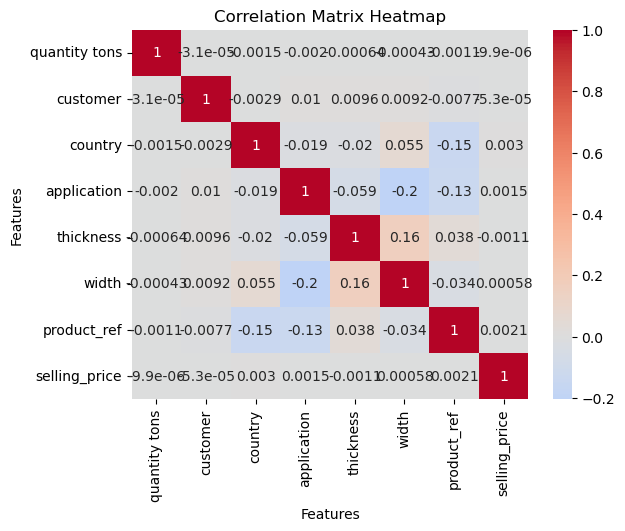

In [36]:
plot_correlation_heatmap(daily_offers_dataset)

*Most of the datset does not show very significant correlation except width and thicknss , However we can replace both the column by multipliying width and thickness with and storing in a new column say area*

### Barchart for relation between status and selling price 

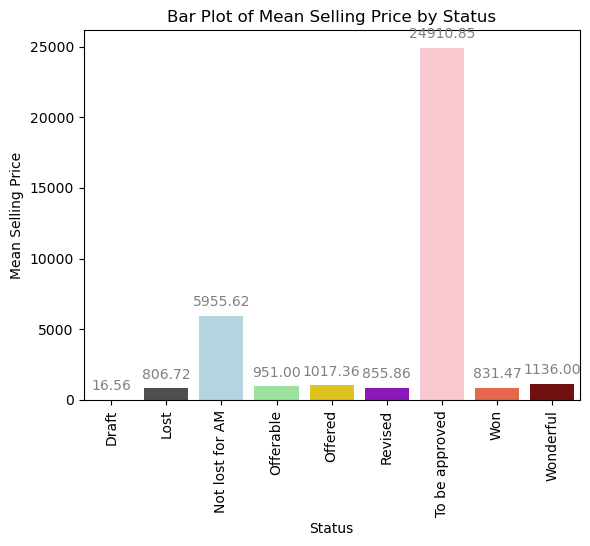

In [37]:

# Define color palette for the bar plot
colors = ["#FC4F30", "#4F4F4F", "#ADD8E6", "#90EE90", "#FFD700", "#9400D3", "#FFC0CB", "#FF5733", "#800000"]

# Create bar plot using Seaborn's barplot function
ax = sns.barplot(data=daily_offers_dataset.groupby("status")["selling_price"].mean().reset_index(), x="status", y="selling_price", palette=colors)

# Set plot title and axis labels
plt.title("Bar Plot of Mean Selling Price by Status")
plt.xlabel("Status")
plt.ylabel("Mean Selling Price")
# Annotate value of each box on top of the bars
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=10, color='gray', xytext=(0, 10),
        textcoords='offset points')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()


##### why bar plot

Bar chart will give the distribution of average of selling price towards wvery possible status of the object 

##### Insght 

*We found out that item which are yet to approved have higher price than others while items which are in draft have the lowest selling price*

### Distribution of selling price across countries

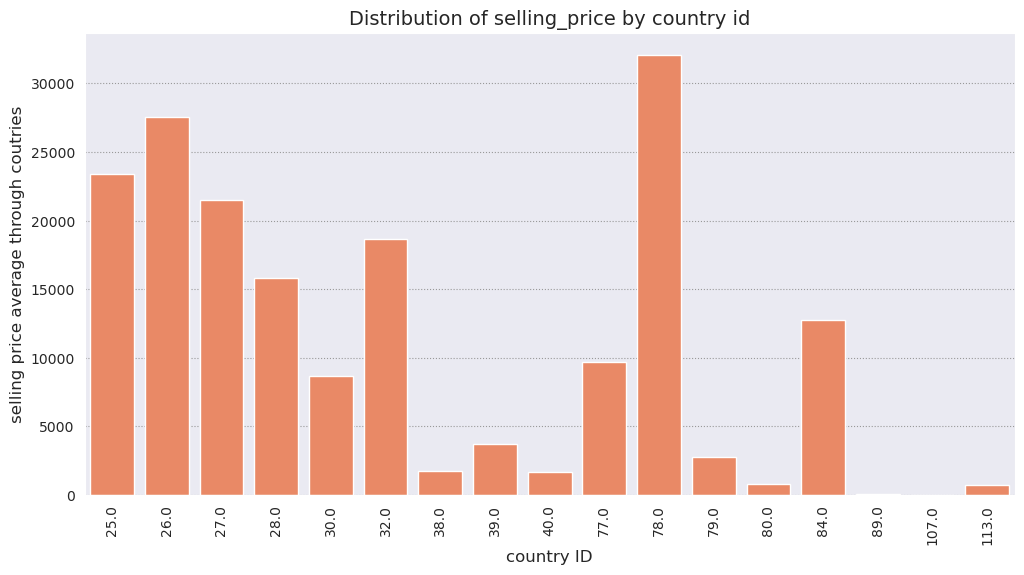

In [38]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

plt.figure(figsize=(12, 6))
sns.barplot(x="country", y="selling_price", data=daily_offers_dataset.groupby("country")['selling_price'].count().reset_index().sort_values('selling_price',ascending = True), color="coral")
# rotate x-axis labels vertically
plt.xticks(rotation=90)
plt.title("Distribution of selling_price by country id", fontsize=14)
plt.xlabel("country ID", fontsize=12)
plt.ylabel("selling price average through coutries", fontsize=12)

# Save the plot to a file
plt.savefig('Distribution of Selling price by coutries ids.png',dpi=300, bbox_inches='tight')
plt.show()

### Distributionof selling price with item type

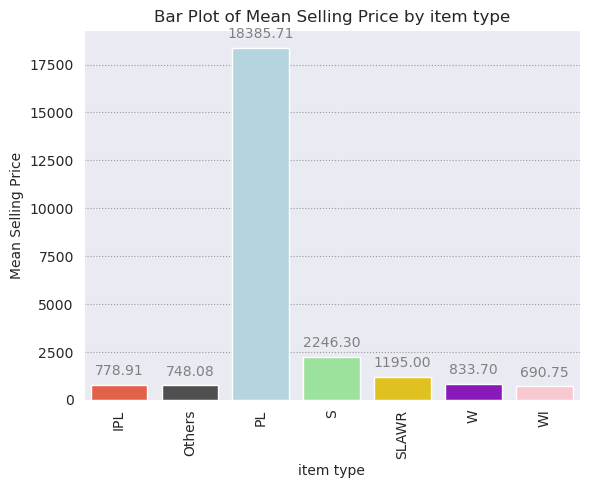

In [39]:

# Define color palette for the bar plot
colors = ["#FC4F30", "#4F4F4F", "#ADD8E6", "#90EE90", "#FFD700", "#9400D3", "#FFC0CB", "#FF5733", "#800000"]

# Create bar plot using Seaborn's barplot function
ax = sns.barplot(data=daily_offers_dataset.groupby("item type")["selling_price"].mean().reset_index(), x="item type", y="selling_price", palette=colors)

# Set plot title and axis labels
plt.title("Bar Plot of Mean Selling Price by item type")
plt.xlabel("item type")
plt.ylabel("Mean Selling Price")
# Annotate value of each box on top of the bars
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=10, color='gray', xytext=(0, 10),
        textcoords='offset points')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()


#### Insights 

*Item type Pl has the largest average selling price*

<Axes: xlabel='selling_price', ylabel='Density'>

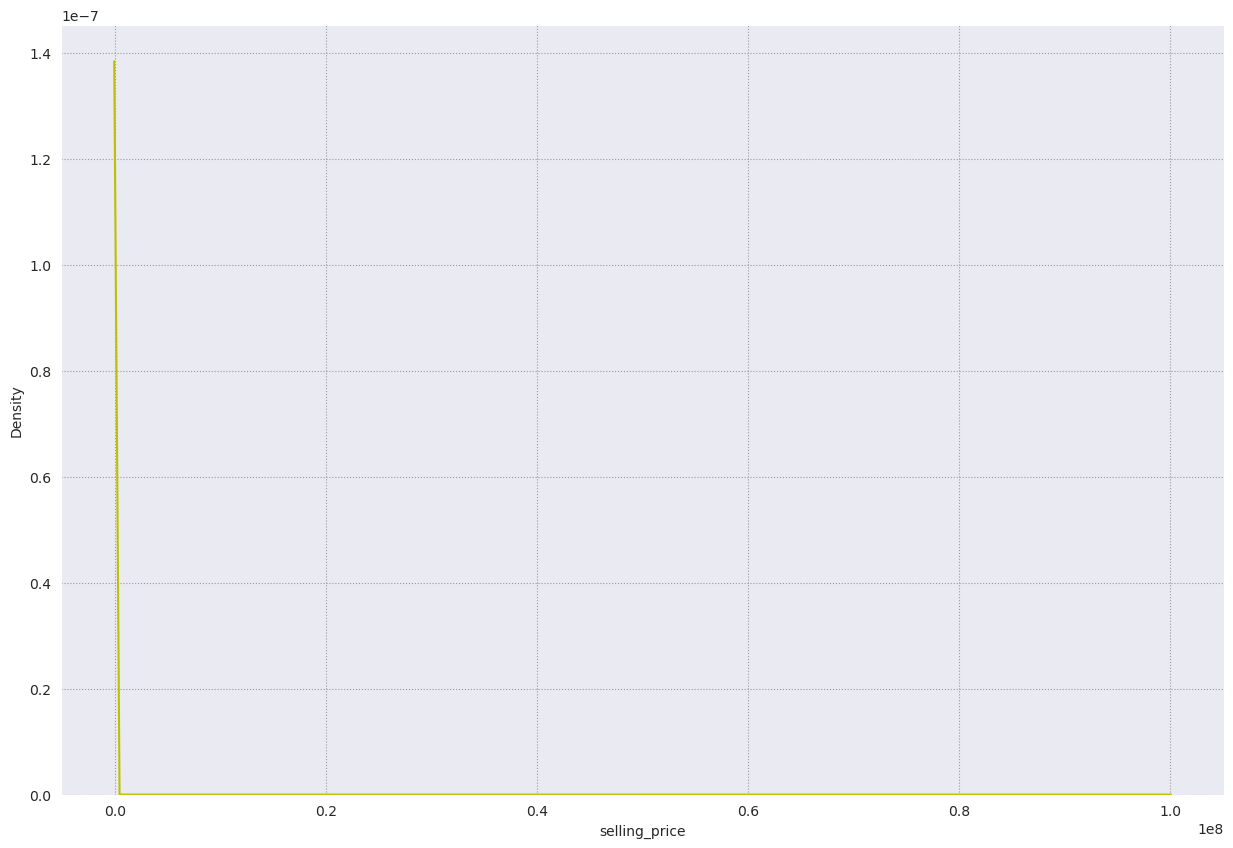

In [40]:
#sns.displot(daily_offers_dataset['quantity tons'], kde=False)
#plt.show()
# Dependent variable 'Price'
plt.figure(figsize=(15,10))
sns.kdeplot(daily_offers_dataset['selling_price'],color="y")

## Data Manipulaton

In [41]:
#width and thickness are correllated data which can cause in model overfitting 
#create another variable Area which is a multiple of width and thickness
daily_offers_dataset["Area"] = daily_offers_dataset["width"]*daily_offers_dataset["thickness"]

In [42]:
# selling price distribution changes with change in difference between delivry date and item date
daily_offers_dataset["Date difference"] = daily_offers_dataset["delivery date"]-daily_offers_dataset["item_date"]

In [43]:
#convert the the data type to time delta 
daily_offers_dataset["Date difference"] = pd.to_timedelta(daily_offers_dataset["Date difference"])
#Select the day from time delta and convert it to int type
daily_offers_dataset["Date difference"] = daily_offers_dataset["Date difference"].dt.days.astype(int)

In [44]:
# create a dictionary with the rank of each status
status_rank = {'Won': 6, 'Draft': 1, 'To be approved': 9, 'Lost': 2, 'Not lost for AM': 8,
               'Wonderful': 5, 'Revised': 7, 'Offered': 3, 'Offerable': 4}
#map the status value with their contribution in average seling price distribution 
daily_offers_dataset['status'] = daily_offers_dataset['status'].map(status_rank)

#### Drop duplicated or unnessary columns 

In [45]:
## Drop unnecessary columns or duplicated columns 
cols_to_drop = ["item_date",'item type',"width","thickness","application","delivery date"]
daily_offers_dataset = daily_offers_dataset.drop(cols_to_drop,axis=1)

*item_date - this column has been since a new column has been cretaed by taking difference between item_date and delivery date*

*item type - this column was acting as a noise column it was causing model in overfitting*

*width - a new column is created by multiplying width and thickness of the item*

*thickness - - a new column is created by multiplying width and thickness of the item*

*application - this column is not acting in increasing in model effeciency where as it is acting a noise*

#### Reducing skewness of the numerical column 

In [46]:
# assume `data` is the column with skewness value of 0
transformed_data, lambda_value = yeojohnson(daily_offers_dataset['selling_price'])

# apply Box-Cox transformation
#transformed_col, lambda_val = boxcox(original_col)
# replace original column with transformed column
daily_offers_dataset['selling_price'] = transformed_data


# Check the skewness of the variable
print('Skewness:', skew(daily_offers_dataset['selling_price']))

Skewness: 8.78809985380057


In [47]:
# apply square root transformation to column 'x'
daily_offers_dataset['Area'] = daily_offers_dataset['Area'].apply(np.sqrt)
# Check the skewness of the variable
print('Skewness:', skew(daily_offers_dataset['Area']))

Skewness: 2.554568114732526


In [48]:
# Check the skewness of the variable
print('Skewness:', skew(daily_offers_dataset['product_ref']))

Skewness: 1.0152192868699017


In [49]:
# Check the skewness of the variable
print('Skewness:', skew(daily_offers_dataset['product_ref']))

Skewness: 1.0152192868699017


In [50]:
daily_offers_dataset = daily_offers_dataset[daily_offers_dataset['quantity tons']>=0]

In [51]:
from scipy.stats import boxcox

# assume 'df' is the dataframe containing the column you want to transform
original_col = daily_offers_dataset['quantity tons']

# apply Box-Cox transformation
transformed_col, lambda_val = boxcox(original_col)

# replace original column with transformed column
daily_offers_dataset['quantity tons'] = transformed_col

In [52]:
# Check the skewness of the variable
print('Skewness:', skew(daily_offers_dataset['quantity tons']))

Skewness: 0.006734424421515392


#### Checking multicollinearity between the columns 

In [53]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [54]:
calc_vif(daily_offers_dataset[[i for i in daily_offers_dataset.describe().columns]])

,variables,VIF
0,quantity tons,6.070606
1,customer,2.502051
2,country,4.371221
3,status,9.782985
4,product_ref,1.502021
5,selling_price,24.027133
6,Area,3.789048
7,Date difference,2.991037


*except Selling price the variance inflation factor of the column lie in the small range of (1-10)*

## DataModelling 

### Data Prepration

In [55]:
#divide the dataset into ratio 3:1 fortraining and testing 
x_train, x_test, y_train, y_test = train_test_split(daily_offers_dataset.drop("selling_price",axis=1),daily_offers_dataset["selling_price"],test_size=0.10)

In [56]:
#Create an instance of the StandardScaler:
scaler = StandardScaler()

#Fit the StandardScaler on the training dataset
scaler.fit(x_train)

#Transform the training dataset using the StandardScaler
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


### Model_1

In [57]:
# Create a PolynomialFeatures object of degree 2
poly = PolynomialFeatures(degree=2)

# Create a Lasso object
lasso = Lasso()

# Create a pipeline that first applies polynomial features and then applies Lasso regression
pipeline = make_pipeline(poly, lasso)

# Define a dictionary of parameter values to search over
param_grid = {'lasso__alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}

# Create a GridSearchCV object with the pipeline and parameter grid
lasso_grid_search = GridSearchCV(pipeline, param_grid, scoring='r2', cv=3)

# Fit the GridSearchCV object to the training data
lasso_grid_search.fit(x_train_scaled, y_train)

# Predict the target variable using the fitted model and the test data
y_pred = lasso_grid_search.predict(x_train_scaled)

# Compute the R-squared of the fitted model on the train  data
r2 = r2_score(y_train, y_pred)

# Print the R-squared 
print("R-squared: ", r2)

# Print the best parameter values and score
print('Best parameter values: ', lasso_grid_search.best_params_)
print('Best score: ', lasso_grid_search.best_score_)

R-squared:  0.22759948791449613
Best parameter values:  {'lasso__alpha': 0.1}
Best score:  0.23331510541777276


In [58]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
pt.fit(daily_offers_dataset["selling_price"].values.reshape(-1, 1))

PowerTransformer()

In [59]:
# Predict the target variable on the test dat
y_pred_l = lasso_grid_search.predict(x_test_scaled)

#Inverse transform the predicted and actual values to their original scale
y_pred_lasso_inv = pt.inverse_transform(y_pred_l.reshape(-1, 1))
y_test_inv = pt.inverse_transform(y_test.values.reshape(-1, 1))

r2 = r2_score((y_test_inv), (y_pred_lasso_inv))
#r2 = r2_score((y_test), (y_pred_l))

print("R2 :" ,r2)

R2 : 0.25105064861011084


### Model_2

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Define a dictionary of parameter values to search over
param_grid = {'max_depth': [3, 5, 7, 10, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': [ 'sqrt', 'log2']}

# Create a GridSearchCV object with the DecisionTreeRegressor and parameter grid
dt_grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, scoring='r2', cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
dt_grid_search.fit(x_train_scaled, y_train)

# Get the best DecisionTreeRegressor model
best_dt = dt_grid_search.best_estimator_

# Make predictions on the test data and calculate the R-squared score
y_pred = best_dt.predict(x_test_scaled)

#Inverse transform the predicted and actual values to their original scale
y_pred_lasso_inv = pt.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = pt.inverse_transform(y_test.values.reshape(-1, 1))
r2 = r2_score(y_test_inv, y_pred_lasso_inv)

# Print the best parameter values and score
print('Best parameter values: ', dt_grid_search.best_params_)
print('Best score: ', dt_grid_search.best_score_)
print('R-squared score on test data: ', r2)


Best parameter values:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
Best score:  0.8339427903578281
R-squared score on test data:  0.9106834550509476


### Model_3

In [61]:

# Define the parameter grid to search over
param_grid = {'n_estimators': [50, 80, 100], 'max_depth': [3, 5, 7]}

# Define the Random forestregressor
rf = RandomForestRegressor()

# Create a GridSearchCV object with the pipeline and parameter grid
rf_grid_search = GridSearchCV(rf, param_grid, scoring='r2', cv=2)

# Fit the GridSearchCV object to the training data

rf_grid_search.fit(x_train, y_train)

# Print the best parameter values and score
print('Best parameter values: ', rf_grid_search.best_params_)
print('Best score: ', rf_grid_search.best_score_)

Best parameter values:  {'max_depth': 7, 'n_estimators': 80}
Best score:  0.7672635968352233


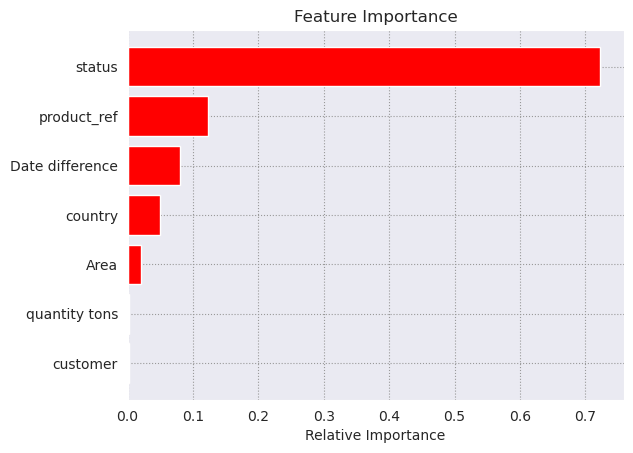

In [62]:
features = x_train.columns
importances = rf_grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)
     

plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()
     

In [63]:
# R2 score of training dataset 
r2 = r2_score((y_train), rf_grid_search.predict(x_train_scaled))
print("R2 :" ,r2)

R2 : -32.20938609534543


In [64]:
# Inverse transform the predicted and actual test data to their original scale
y_pred_lasso_inv = pt.inverse_transform(rf_grid_search.predict(x_test).reshape(-1, 1))
y_test_inv = pt.inverse_transform(y_test.values.reshape(-1, 1))

In [65]:
# Print the R-squared
r2 = r2_score((y_test_inv),y_pred_lasso_inv )
print("R2 :" ,r2)

R2 : 0.8645419176937008


### Model_4

In [66]:
# Create an instance of the XGBRegressor model
model_xgb = XGBRegressor()

# Fit the model to the training data
model_xgb.fit(x_train, y_train, early_stopping_rounds=None, verbose=True)

# Print the R-squared score on the training data
print("Xgboost Accuracy =", r2_score(y_train, model_xgb.predict(x_train)))

Xgboost Accuracy = 0.9415661693514737


In [67]:
# Inverse transform the predicted and actual test data to their original scale
y_pred_lasso_inv = pt.inverse_transform(model_xgb.predict(x_test).reshape(-1, 1))
y_test_inv = pt.inverse_transform(y_test.values.reshape(-1, 1))

# Calculate R-squared using the inverse transformed data
r2 = r2_score((y_test_inv), (y_pred_lasso_inv))

# Print the R-squared
print("R2: ", r2)


R2:  0.935707391551323


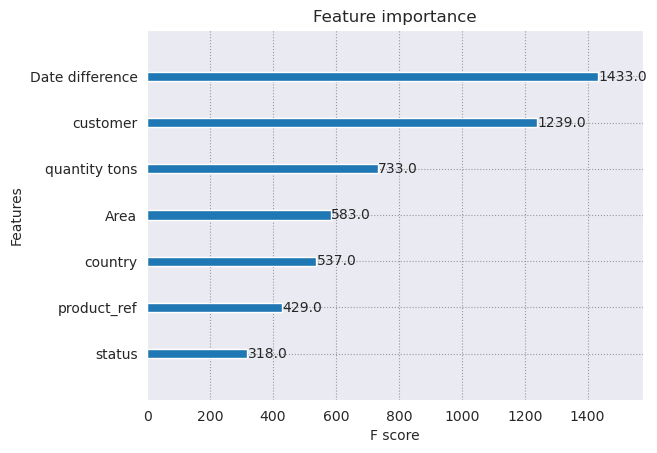

In [68]:
from xgboost import plot_importance
# Plot the feature importances
plot_importance(model_xgb, max_num_features=len(importances))
plt.show()

*I used the Linear Regression with L1 Regularization first because it provided a good starting point for understanding the relationship between the input and output variables. Then I moved on to the Decision Tree Regressor to capture any non-linear relationships in the data. Next, I used the Random Forest Regressor to reduce overfitting and increase accuracy. Finally, I used the XG Boost Regressor to further improve accuracy and handle complex data. I chose this sequence based on the individual strengths of each algorithm and their ability to complement each other for the task at hand*

# Explaining the best performing model

 98%|===================| 17882/18167 [00:57<00:00]        

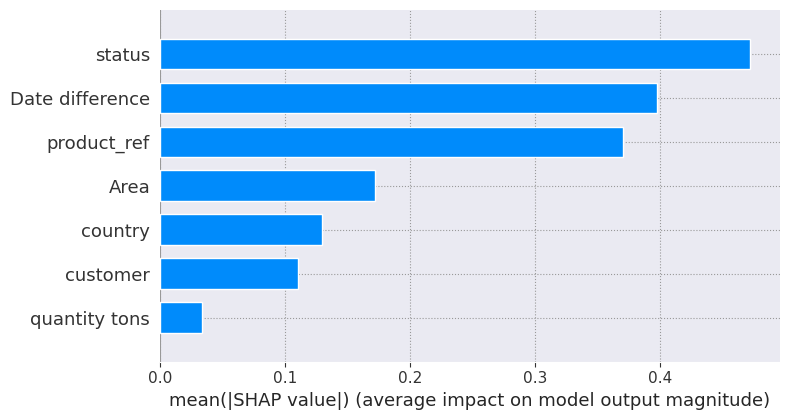

In [69]:
import shap

# Create an explainer object
explainer = shap.Explainer(model_xgb, x_train)

# Calculate SHAP values for the X test data
shap_values = explainer(x_test)

# Print the SHAP values
shap.summary_plot(shap_values, x_test, plot_type="bar")

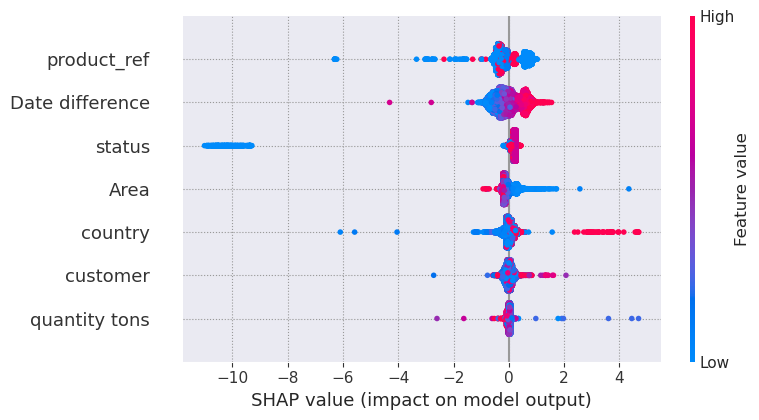

In [70]:
# Obtain SHAP values for the test set
shap_values = shap.TreeExplainer(model_xgb).shap_values(x_test)

# Create a summary plot of SHAP values
shap.summary_plot(shap_values, x_test)

In [71]:
import eli5 as eli
# Weights for Random Forest
eli.explain_weights(model_xgb)

Weight,Feature
0.7882,status
0.0969,product_ref
0.0391,country
0.0230,quantity tons
0.0215,Area
0.0203,Date difference
0.0109,customer


In [72]:
# Random Forest  Show Prediction and explaining with all features
eli.show_prediction(model_xgb, x_train.loc[1],
                    feature_names=list(x_train.columns),
                    show_feature_values=True)

# Conclusions

*Differnt between the product delivery date and item date has very significance on selling price*

*Pl item_type has a very selling price as comapared to other item types* 

*The country having coded as 78 has signifcant selling price*

*The itme whose status are to be approved has very high average price*

*There are some column which are acting as a noise we could free up our data storage by not collecting them like application*

*Used four model using cross validation for traing the model , the two most best performing models are xgboost and Decision tree Giving accuracy gretaer than 90%*

# Model Deployment 

In [73]:
import pickle 
pickle.dump(model_xgb, open('model.pkl','wb'))

In [86]:
model = pickle.load(open('model.pkl','rb'))
input_data = np.array([-1.56605566, -0.01199155, -0.24220348, 1.29487271, 1.66774441, 0.53869433, 1.4102419])
input_data_2d = np.reshape(input_data, (1, -1))
output = model.predict(input_data_2d)
print(output)

[4.2585316]


In [81]:
x_train_scaled[1]

array([-1.56605566, -0.01199155, -0.24220348,  1.29487271,  1.66774441,
        0.53869433,  1.4102419 ])